In [47]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.model_selection import train_test_split


def normalize_position(pos):
    origin = np.expand_dims(pos[:, 0], -1)
    pos = np.diff(pos - origin)
    origin_ = np.expand_dims(np.array((0, 0, 0)), 1)
    pos = np.hstack([origin_, pos])
    
    return pos


def apply_moving_window(spike, pos, window=10):
    bins = np.arange(0, spike.shape[1], window)   
    pos = normalize_position(pos)
    
    count_spike = np.array([])
    vel_x, vel_y = np.array([]), np.array([])

    
    for bin_ in bins:
        count_res = np.sum(spike[:, bin_:bin_ + window], 1)  
        count_spike = np.hstack([count_spike, count_res])
        
        vel = np.diff(pos[:, bin_:bin_ + window], axis=1)
        vel_x = np.hstack([vel_x, np.mean(vel[0])])
        vel_y = np.hstack([vel_y, np.mean(vel[1])])
        
    count_spike = count_spike.reshape(98, -1)
        
    return count_spike, vel_x, vel_y
    
    
data = loadmat("data/monkeydata.mat")['trial']

target_list = []
count_spike_list = []
vel_x_list, vel_y_list = [], []

for trials in data:
    for target, trial in enumerate(trials):
        target_list.append(target)
        count_spike, vel_x, vel_y = apply_moving_window(trial[1], trial[2])
        
        count_spike_list.append(count_spike)
        vel_x_list.append(vel_x)
        vel_y_list.append(vel_y)

        
print(f"target: {len(target_list)}")
print(f"count spikes: {len(count_spike_list)}")

target: 800
count spikes: 800


In [48]:
import pickle

with open("data/processed_monkey_dataset.pkl", "wb") as f:
    pickle.dump([target_list, count_spike_list, vel_x_list, vel_y_list], f)

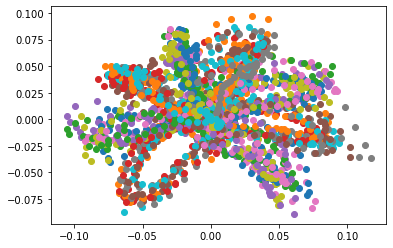

In [49]:
for i in range(100):
    plt.scatter(np.cumsum(vel_x_list[i]), np.cumsum(vel_y_list[i]))